In [53]:
# Import pandas library

import missingno as msno
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
# Read data

file_path = '/Users/sofi/Desktop/Coursera/CourseraDataset-Unclean.csv'
df = pd.read_csv(file_path)

display(df.head())

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues


In [110]:
display(df.describe())

,Rating
count,8156.000000
mean,4.651533
std,0.240674
min,1.500000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [161]:
# Display the data type of each column to obtain a statistical summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         9595 non-null   object 
 1   Rating               8156 non-null   float64
 2   Level                8330 non-null   object 
 3   Duration             9333 non-null   object 
 4   Schedule             8912 non-null   object 
 5   Review               8152 non-null   object 
 6   What you will learn  4984 non-null   object 
 7   Skill gain           9595 non-null   object 
 8   Modules              9595 non-null   object 
 9   Instructor           9595 non-null   object 
 10  Offered By           9595 non-null   object 
 11  Keyword              9595 non-null   object 
 12  Course Url           9595 non-null   object 
dtypes: float64(1), object(12)
memory usage: 974.6+ KB


In [126]:
# Check for duplicates in the dataset

num_duplicates = df.duplicated().sum()
print(num_duplicates)

900


In [361]:
# Delete duplicates

df_cleaned = df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<Axes: >

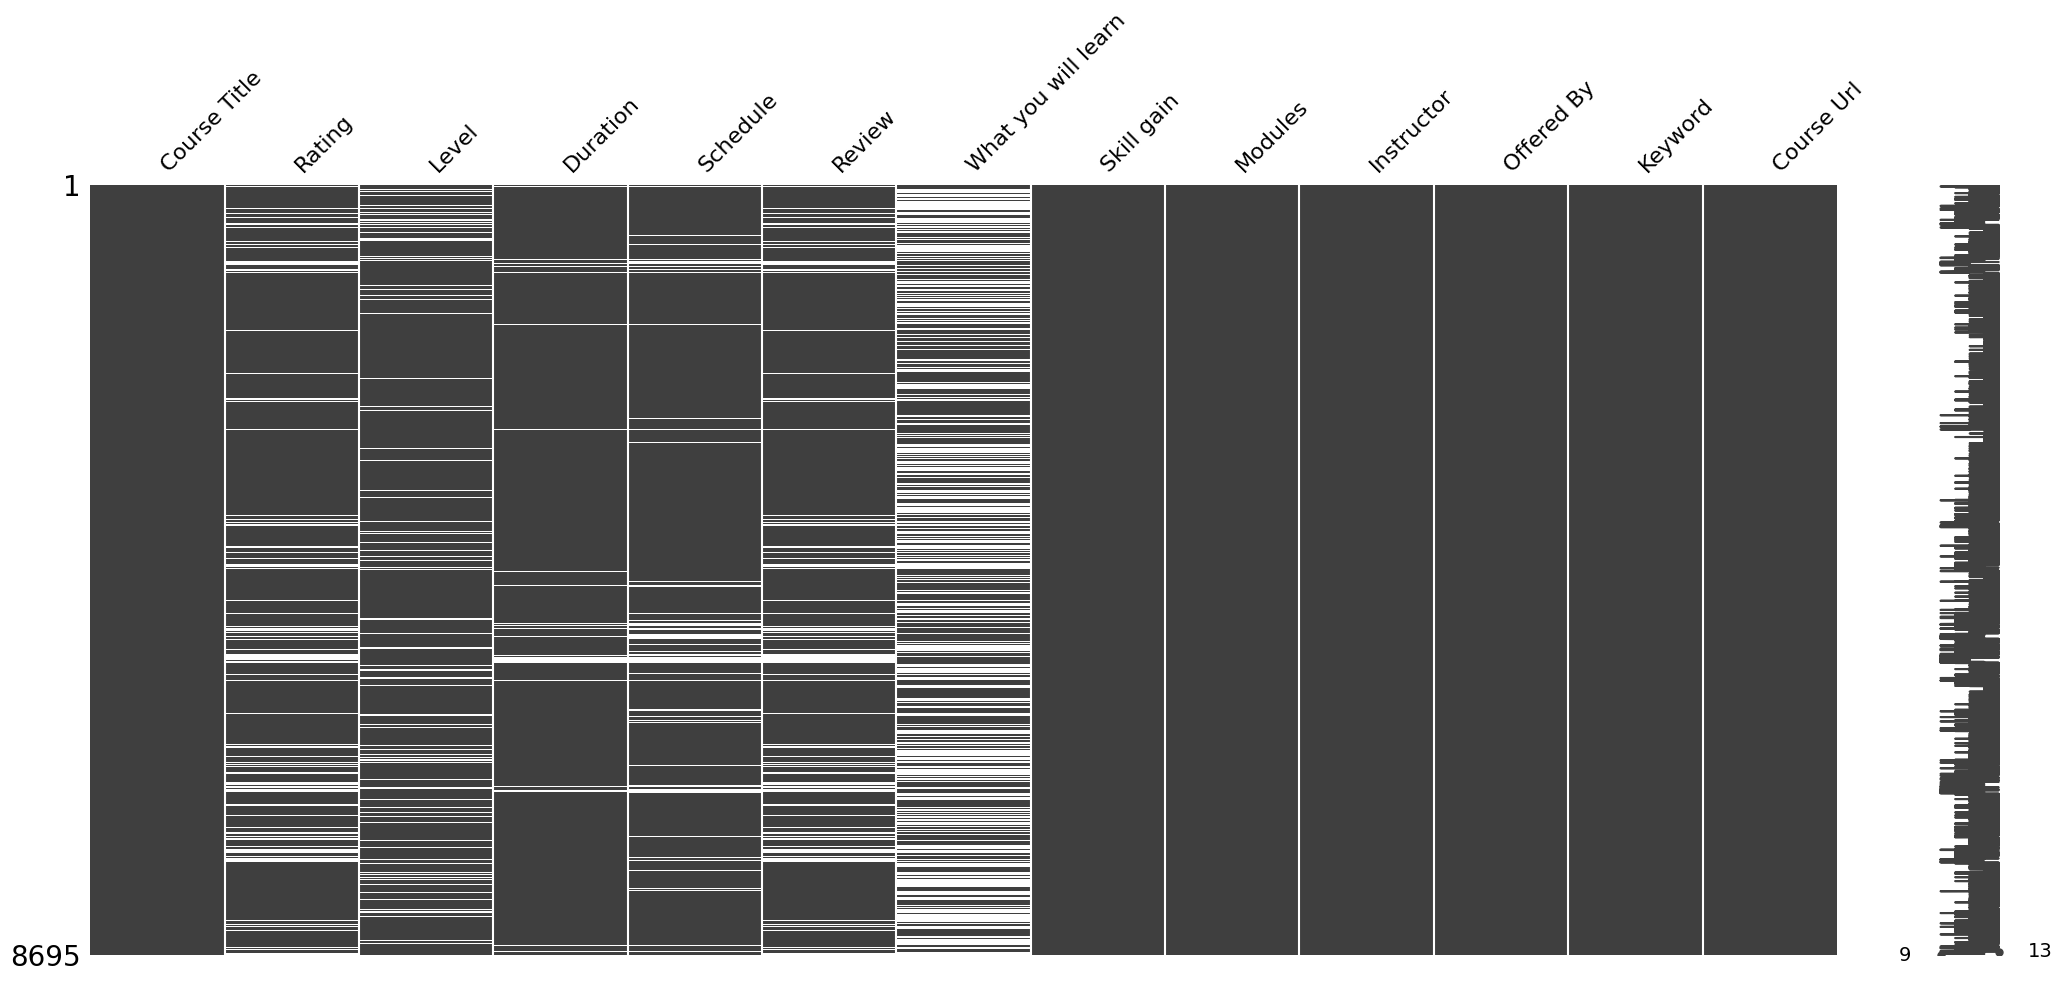

In [362]:
# Check for missing values using the missingno library

msno.matrix(df)

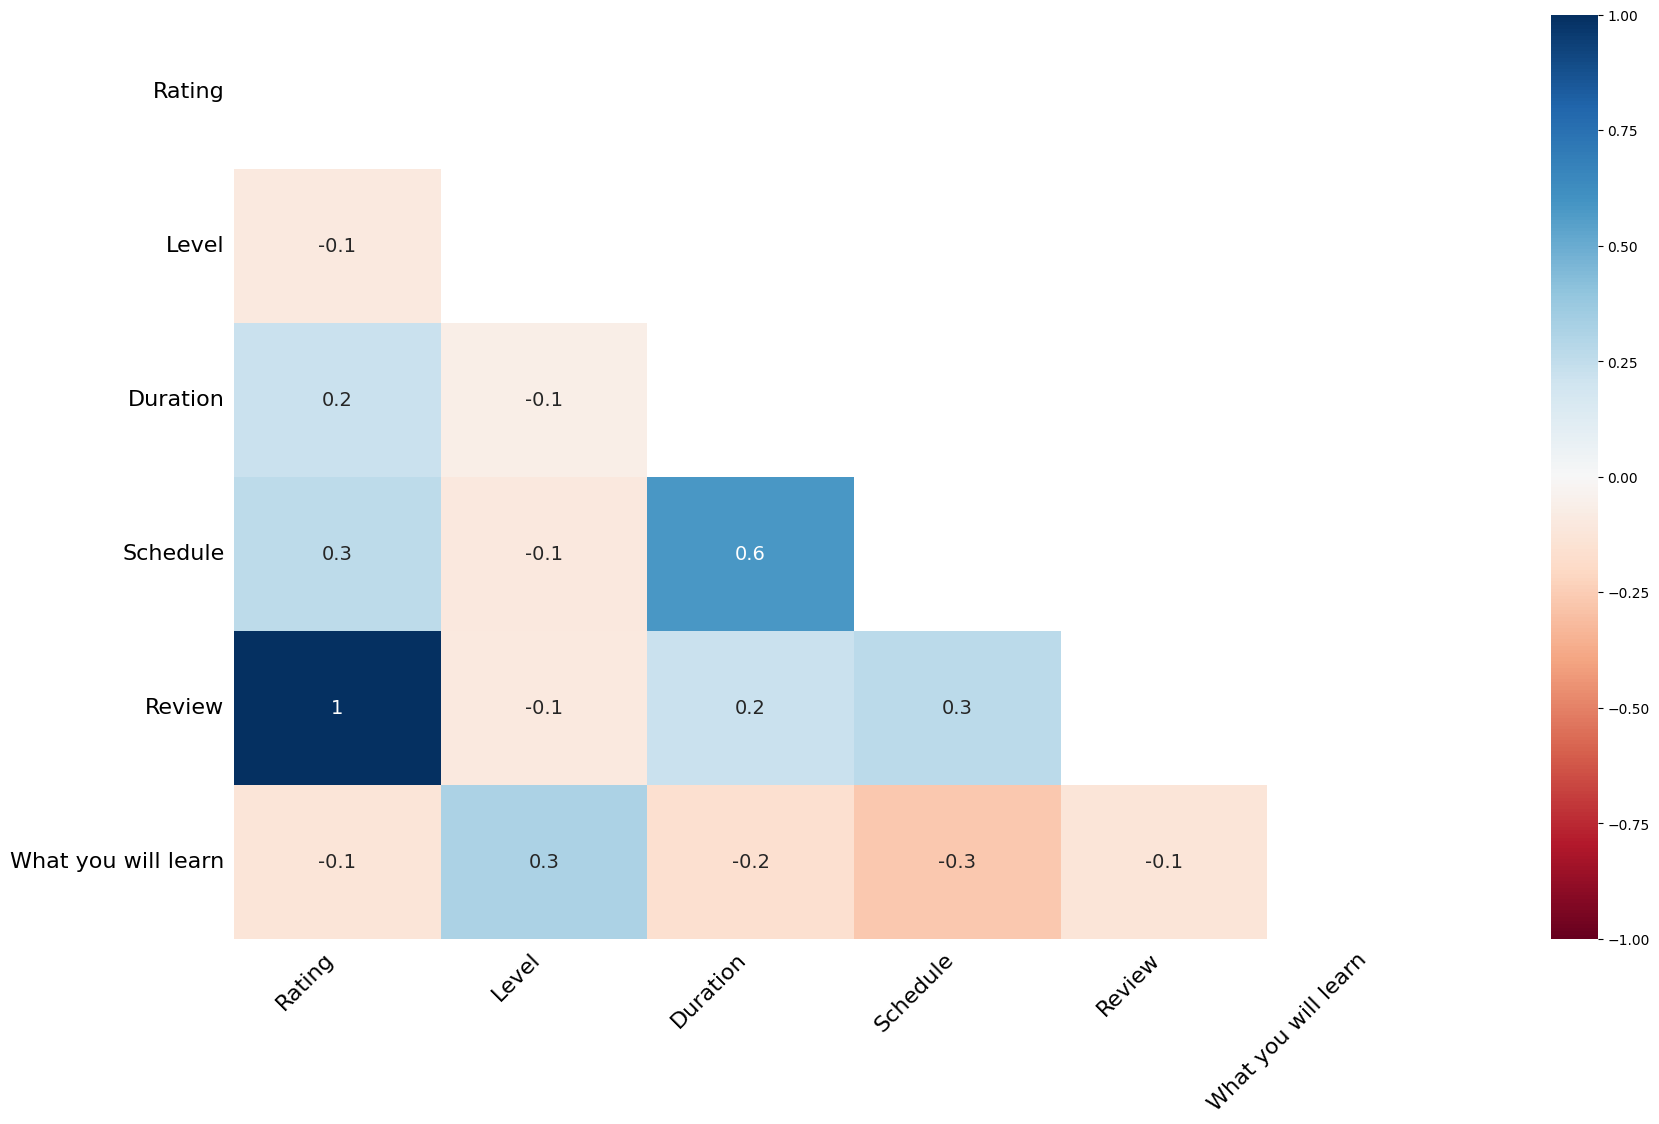

In [363]:
# Display correlation between columns using a heatmap

msno.heatmap(df)
plt.show()

In [ ]:
# Drop useless columns

df.drop(columns=['Schedule', 'What you will learn'], inplace=True)
df.drop(columns=['Skill gain'], inplace=True)

In [365]:
# Check for NaN values in the 'Duration' column

count_nan_duration = df['Duration'].isna().sum()
print("Number of NaN values in 'Duration' column: {count_nan_duration}")


Number of NaN values in 'Duration' column: 241


In [421]:
# Drop NaN values from the 'Duration' column

df.dropna(subset=['Duration'], inplace=True)

In [412]:
# Fill missing values in the 'Rating', 'Level', and 'Duration' columns

df['Rating'].fillna(0, inplace=True)
df['Level'].fillna('Not Provided', inplace=True)
df['Duration'].fillna('0', inplace=True)
df['Review'].fillna(0, inplace=True)



In [ ]:
# Convert data in the 'Duration' column (convert months and weeks to hours)

import re

def convert_duration(duration):
        hours_match = re.search(r'(\d+)\s*hours', duration, re.IGNORECASE)
        if hours_match:
            return int(hours_match.group(1))
        months_match = re.search(r'(\d+)\s*months?.*?(\d+)\s*hours?.*?week', duration, re.IGNORECASE)
        if months_match:
            months = int(months_match.group(1))
            hours_per_week = int(months_match.group(2))
            weeks = months * 4  # Assuming 1 month = 4 weeks
            return weeks * hours_per_week
        return np.nan 

# Apply function to 'Duration' column
df['Duration'] = df['Duration'].apply(convert_duration)

print(df['Duration'])

In [389]:
# Remove square brackets in columns

remove_square_brackets = ['Skill gain', 'Modules', 'Instructor', 'Offered By']
    
for column in remove_square_brackets:
    df[column] = df[column].astype(str).str.replace(r'[\[\]\']', '', regex=True)
        
print(df[remove_square_brackets].head())

                               Skill gain  \
0   Art History, Art, History, Creativity   
1                                           
2                                           
3                                           
4  Music, Chord, Jazz, Jazz Improvisation   

                                             Modules  \
0  Introduction, Heroes, Silhouettes, Coutures, L...   
1  Orientation, Module 1, Module 2, Module 3, Mod...   
2  Week 1: Introduction to Pixel Art, Week 2: Pix...   
3             Semana 1, Semana 2, Semana 3, Semana 4   
4  Blues Progressions – Theory and Practice , Blu...   

                                          Instructor  \
0  Anna Burckhardt, Paola Antonelli, Michelle Mil...   
1                                        Cary Nelson   
2                   Andrew Dennis, Ricardo Guimaraes   
3                          Eduardo de la Vara Brown.   
4                                  Dariusz Terefenko   

                                   Offered By  
0      

In [396]:
# Remove 'Level' and 'Reviews' from the 'Level' and 'Review' columns

clean_columns = ['Level', 'Review']
    
for column in clean_columns:
    df[column] = df[column].astype(str).str.replace(r'\b(Level|Review)\b', '', regex=True, case=False).str.strip()

print(df[clean_columns].head())

      Level Review
0  Beginner  2,813
1  Beginner    100
2  Beginner    227
3  Beginner      0
4  Beginner    582


In [402]:
# Replace ',' with '.' in the 'Review' column

df['Review'] = df['Review'].astype(str).str.replace(',', '.', regex=False)

print(df['Review'].head())

0    2.813
1      100
2      227
3        0
4      582
Name: Review, dtype: object


In [419]:
display(df.head())

,Course Title,Rating,Level,Duration,Review,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner,20.0,2.813,"Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner,34.0,100,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner,9.0,227,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,0.0,Beginner,8.0,0,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner,11.0,582,"Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues


In [ ]:
# Data Visualization with cleaned data

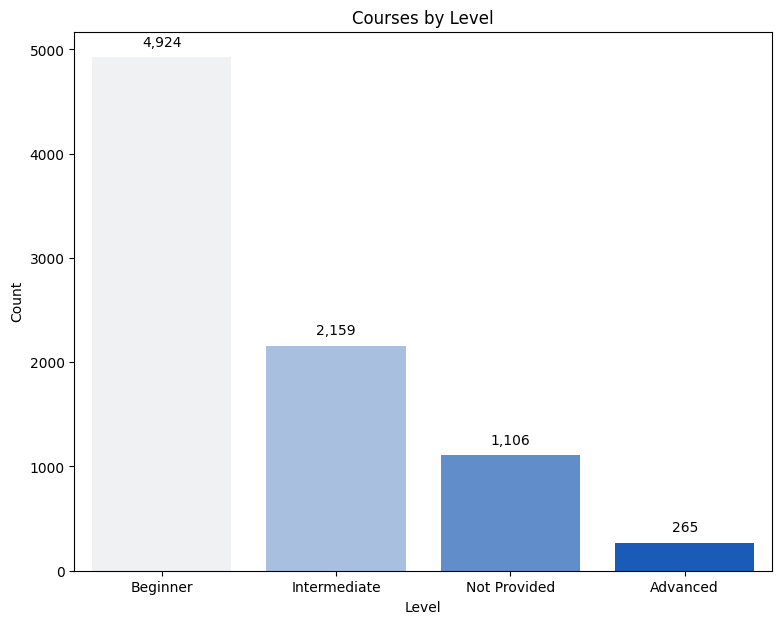

In [408]:
# Create a graph of course levels on Coursera

# Set the figure size
plt.figure(figsize = (9,7)) 
plt.xticks(rotation=0) 

# Create a color palette for the bars
colors = sns.light_palette("#0056D2",4)

sns.countplot(x = 'Level', data = df, hue = 'Level', palette=colors, legend = False)

ax = plt.gca()

# Formatting bars (add labels, positioning text)
for bar in ax.patches: 
    height = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, height + 80, 
        f"{height:,.0f}", 
        ha = 'center', va = 'bottom')

# Set titles and labels
plt.title('Courses by Level')
plt.xlabel('Level')
plt.ylabel('Count')


plt.show()


/var/folders/7l/mwmgzy6s56d4_m2c29rbz9940000gn/T/ipykernel_907/539970900.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)


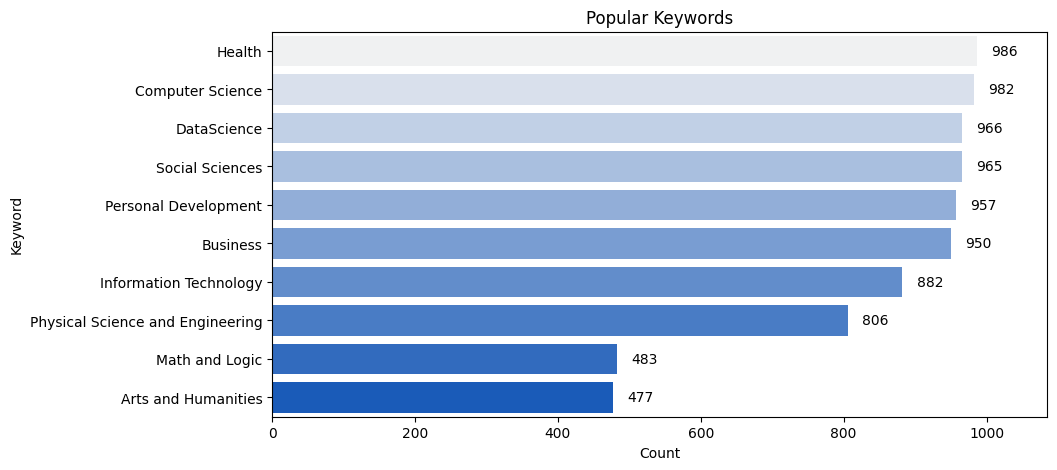

In [409]:
# Create a graph of popular keywords on Coursera

# Set the figure size
plt.figure(figsize=(10, 5)) 
plt.xticks(rotation=0) 

# Get the top 10 keywords
top_n = 10
sorted_counts = df['Keyword'].value_counts().nlargest(top_n) 

# Create a color palette for the bars
colors = sns.light_palette("#0056D2", n_colors=len(sorted_counts))

# Plot the bar graph
sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)

ax = plt.gca()

# Set the x-axis limits
plt.xlim(0, sorted_counts.values.max() * 1.1)

# Formatting bars (add labels, positioning text)
for bar in ax.patches: 
    height = bar.get_width() 
    plt.text(height + 20, bar.get_y() + bar.get_height() / 2, 
             f"{height:,.0f}", 
             va='center', ha='left')

# Set titles and labels
plt.title('Popular Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')


plt.show()

/var/folders/7l/mwmgzy6s56d4_m2c29rbz9940000gn/T/ipykernel_907/2687902958.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)


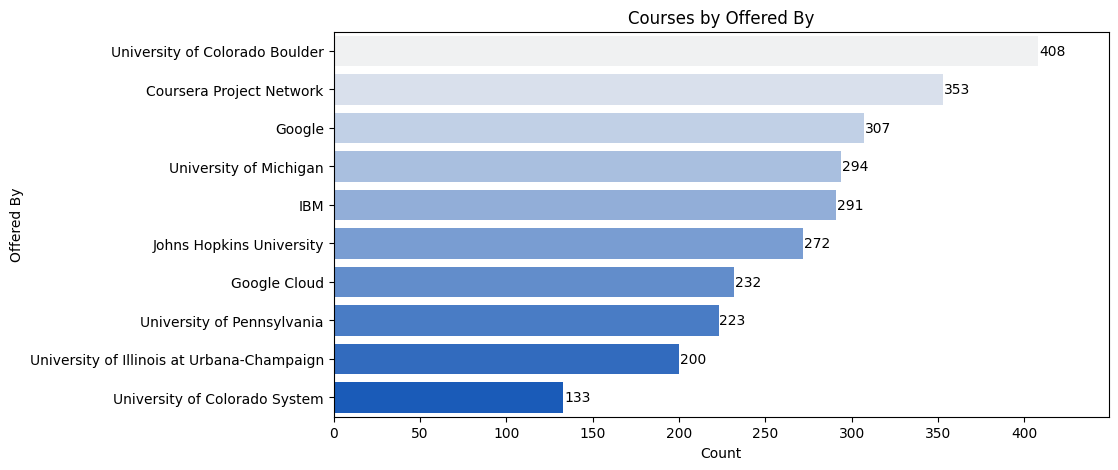

In [410]:
# Create a graph of Offered By on Coursera

# Set the figure size
plt.figure(figsize=(10, 5))
plt.xticks(rotation=0)

# Get the top 10 keywords
top_n = 10
sorted_counts = df['Offered By'].value_counts().nlargest(top_n) 

# Create a color palette
colors = sns.light_palette("#0056D2", n_colors=len(sorted_counts))

# Plot the bar graph
sns.barplot(x=sorted_counts.values, y=sorted_counts.index, palette=colors)

# Get the current axis
ax = plt.gca()

# Set the x-axis limits
plt.xlim(0, sorted_counts.values.max() * 1.1)

# Annotate bars with counts
for bar in ax.patches:
    height = bar.get_width()  # Use get_width() for horizontal bars
    plt.text(height + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{height:,.0f}",
             ha='left', va='center')

# Set titles and labels
plt.title('Courses by Offered By')
plt.xlabel('Count')
plt.ylabel('Offered By')


plt.show()